# Test time complexity *vs.* linear chain size

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from fuNEGF.models import LinearChain
import timeit
from scipy.optimize import curve_fit

## Define static parameters

In [38]:
# static parameters
eps_0 = 0
t = 1
a = 1

## Time complexity of model construction and $T(E)$ calculation for a clean system

Text(365.4722222222223, 0.5, '')

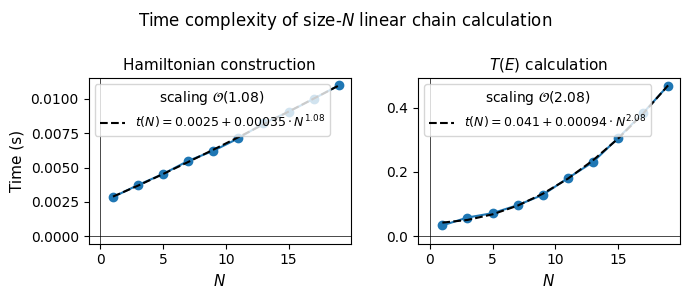

In [53]:
N_all = np.arange(1, 20, 2)
times_constr_only_all = []
times_constr_and_transmission_all = []

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))

for N in N_all:

    def time_constr():
        chain = LinearChain(N, eps_0, t, a, plot_dispersion=False)

    chain = LinearChain(N, eps_0, t, a, plot_dispersion=False)
    def time_transmission_calculation():
        chain.plot_transmission(ax=ax)

    t_constr_only = timeit.timeit(lambda: time_constr(), number=100)
    t_constr_and_transmission = timeit.timeit(lambda: time_transmission_calculation(), number=30)

    times_constr_only_all.append(t_constr_only)
    times_constr_and_transmission_all.append(t_constr_and_transmission)
plt.close()

def fit_power_law_and_plot(N_all, times_all, ax, title, label, color, linestyle, marker):
    # fit data with a power law
    def power_law(x, a, b, c):
        return a + b * np.power(x, c)
    N_all = np.array(N_all)
    times_all = np.array(times_all)
    p0 = [0, 0.01, 1]
    p = curve_fit(power_law, N_all, times_all, p0=p0)[0]

    if ax is None: fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))
    ax.plot(N_all, times_all, 'o-')
    ax.plot(N_all, power_law(N_all, *p), 'k--', label=f'$t(N) = {p[0]:.2g} + {p[1]:.2g}' + r' \cdot N^{' + f'{p[2]:.2f}' + r'} $')
    ax.set_xlabel(r'$N$', fontsize=11)
    ax.set_ylabel('Time (s)', fontsize=11)
    ax.legend(title=r'scaling $\mathcal{O}(' + f'{p[2]:.3g}' + r')$', loc='upper left', fontsize=9)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    if title is None: title = r'Time complexity of size-$N$ ' + '\n' + r'linear chain $T(E)$ calculation'
    ax.set_title(title, fontsize=11)
    plt.tight_layout()

fig, axes = plt.subplots(1, 2, figsize=(7.0, 3))
plt.suptitle('Time complexity of size-$N$ linear chain calculation', fontsize=12)
fit_power_law_and_plot(N_all, times_constr_only_all, ax=axes[0], label='construction only', color='C0', linestyle='-', marker='o', title='Hamiltonian construction')
fit_power_law_and_plot(N_all, times_constr_and_transmission_all, ax=axes[1], label='transmission', color='C1', linestyle='-', marker='o', title=r'$T(E)$ calculation')
axes[1].set_ylabel('')    

- Hamiltonian construction $\mathcal{O}(N)$
- $T(E)$ calculation $\mathcal{O}(N^2)$
  - $\mathcal{O}(N^{\approx 2})$ correponds to matrix multiplication
    - "As of January 2024, the best bound on the asymptotic complexity of a matrix multiplication algorithm is O(n2.371552)." (wiki)
    - "numpy is "incredibly fast" in matrix multiplication, using a highly optimized BLAS (Basic Linear Algebra Subprograms) implementation"